In [52]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import sklearn

### Portfolio Problem 1: Week 1 Advanced Problem 3
My first week's advanced problem had to do with finding polynomials that went through certain points. This code block below defines a matrix of the following meaning: The first four columns are the $x$ values of the points raised to the 0th, 1st, 2nd, and 3rd power respectively. The final column is their respective $y$ values. This is treated as an augmented column. After defining this matrix, we put it into reduced row echelon form and we can see what each of the coefficients needs to be to go through those points.

In [ ]:
# part A

m1 = sp.Matrix(
    [[1, -3, 9, -27, -13],
     [1, -1, 1, -1, 2],
     [1, 1, 1, 1, -3],
     [1, 3, 9, 27, -4]
     ])

sp.pprint(m1.rref())

⎛⎡1  0  0  0  1/2⎤              ⎞
⎜⎢               ⎥              ⎟
⎜⎢0  1  0  0  -3 ⎥              ⎟
⎜⎢               ⎥, (0, 1, 2, 3)⎟
⎜⎢0  0  1  0  -1 ⎥              ⎟
⎜⎢               ⎥              ⎟
⎝⎣0  0  0  1  1/2⎦              ⎠


In this case, we can see that $a_0$ (or the coefficient of $x^0$) is $\frac{1}{2}$, $a_1$ is $-3$, $a_2$ is $-1$, and $a_3$ is $\frac{1}{2}$ from the augmented component of our matrix printout.

For part B, we do the same proceedure of setting up a matrix with all $x$ values raised to certain powers, but add another column before the $y$ values. Once reduced, this will result in a matrix that represents a system of linear equations with a free variable.

In [7]:
# part B

m2 = sp.Matrix(
    [[1, -3, 9, -27, 81, -13],
     [1, -1, 1, -1, 1, 2],
     [1, 1, 1, 1, 1, -3],
     [1, 3, 9, 27, 81, -4]
     ])

sp.pprint(m2.rref())

⎛⎡1  0  0  0  -9  1/2⎤              ⎞
⎜⎢                   ⎥              ⎟
⎜⎢0  1  0  0  0   -3 ⎥              ⎟
⎜⎢                   ⎥, (0, 1, 2, 3)⎟
⎜⎢0  0  1  0  10  -1 ⎥              ⎟
⎜⎢                   ⎥              ⎟
⎝⎣0  0  0  1  0   1/2⎦              ⎠


Here, we can see that our coefficients will be defined as $a_0=\frac{1}{2}+9a_4$, $a_1=-3$, $a_2=-1-10a_4$, $a_3=\frac{1}{2}$, and $a_4\in\mathbb{R}$. There exists a solution for any $a_4$.

Finally, for part C, we're tasked with writing a function that applies this system generally (although this function does not allow us to find *all* polynomials of a certain degree; rather, it finds the single unique polynomial of minimal degree that passes through the unique points provided.)

In [139]:
# part C
def findPolynomial(points: list) -> str:
    """
    Finds the polynomial of degree len(points)-1 that passes through
    all points given and outputs a string representation of that
    polynomial
    """
    
    # unpack points
    xs = list(zip(*points))[0] # get all x values
    ys = list(zip(*points))[1] # get all y values

    # check precondition
    if len(xs) != len(ys):
        raise Exception("Your xs and ys are not the same length!")

    # create rows of matrices
    degree = len(xs)
    matrixList = []
    ys = list(ys[::-1]) # allows popping off a y for every x iteration
    for x in xs:
        row = [x**i for i in range(degree)] # powers of x_m
        matrixList.append(row)
        row.append(ys.pop())

    # create sympy Matrix object and reduce
    echelonMatrix = sp.Matrix(matrixList).rref()

    # get coefficients from reduced matrix
    coefficients = []
    for i in range(degree):
        coefficients.append(echelonMatrix[0].row(i)[-1])

    # create String representation of the polynomial
    stringRep = ""
    exp = degree-1
    while len(coefficients) > 0:
        stringRep += str(coefficients.pop()) + "x^" + str(exp)
        exp -= 1
        if len(coefficients) > 0: # add plus if this isn't the last elt
            stringRep += " + "

    return stringRep

For an example of using this function, the next code block redoes part A to demonstrate the functionality.

In [140]:
points = [(-3, -13), (-1, 2), (1, -3), (3, -4)]
print(findPolynomial(points))

1/2x^3 + -1x^2 + -3x^1 + 1/2x^0


### Portfolio Problem 2: Week 2 Advanced Problem 4
This problem tasked us to create random matrices of certain rank using techniques that would (almost) always produce matrices of maximal rank. The reason I say "almost" is that it is theoretically possible for two random matrices to have similar rows, but this is incredibly unlikely.

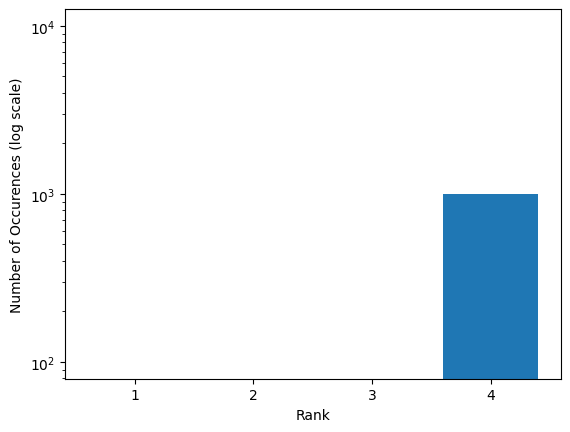

In [ ]:
# part A

# make 1000 random 4x4 matrices
matrices = [np.random.randn(4,4) for _ in range(1000)]

# find the ranks of every random matrix
matRanks = [np.linalg.matrix_rank(matrix) for matrix in matrices]

# count the number of occurences of each rank (1-4)
rankcounts = [len(list(filter((lambda x : x == i), matRanks))) for i in range(1,5)]

# plot the occurences of each rank count
plt.bar(["1","2","3","4"], rankcounts)
plt.xlabel("Rank")
plt.ylabel("Number of Occurences (log scale)")
plt.yscale('log') # logarithmic scale to show clearly if any ranks occur even infrequently
plt.show()

In the graph shown above, we can see the ranks of 1000 random 4x4 matrices. Unless you're incredibly lucky, you'll see 0 matrices of any rank other than 4. If you see a rank 1 matrix in the graph, go buy yourself a lottery ticket!

In part B, we generate 1000 4x3 matrices and 1000 3x4 matrices, multipling each pair together to produce a 4x4 matrix. Since the rank of a 4x3 matrix cannot exceed 3, we know (from our previous part) that these matrices will have rank 3 with near guaranteed probability.

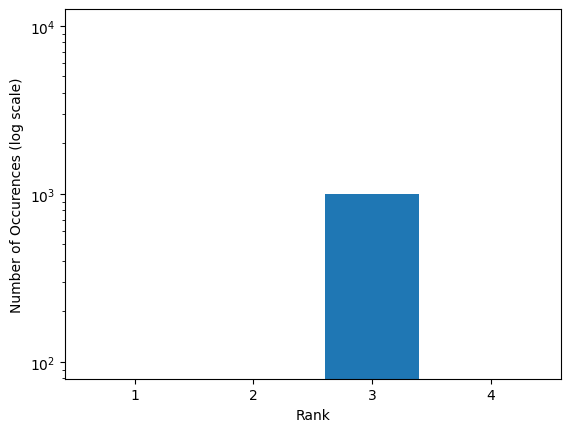

In [112]:
# part B

# 1000 random 4x3 and 3x4 pairs
matrixPairs = [(np.random.randn(4,3),np.random.randn(3,4)) for _ in range(1000)]

# multiply each pair of matrices to make 4x4 matrices
products = [A @ B for (A,B) in matrixPairs]

# get the rank of each product matrix
prodRanks = [np.linalg.matrix_rank(product) for product in products]

# count the number of occurences of each rank (1-4)
rankcounts = [len(list(filter((lambda x : x == i), prodRanks))) for i in range(1,5)]

# plot the occurences of each rank count
plt.bar(["1","2","3","4"], rankcounts)
plt.xlabel("Rank")
plt.ylabel("Number of Occurences (log scale)")
plt.yscale('log') # logarithmic scale to show clearly if any ranks occur even infrequently
plt.show()

In this case, we see that all matrices produced in this manner are of rank 3 (unless you're very lucky).

For part C, we can use this idea of generating smaller matrices of lower rank and multipling them together to make a larger matrix of lower rank.

In [137]:
# part C
def makeSquareMatrixOfRankK(n: int, k: int) -> np.matrix:
    """
    Generates a square matrix that is n*n with rank k by multiplying two
    smaller matrices together
    """
    if (k > n):
        raise Exception("k must be less than or equal to n.")
    return np.random.randn(n,k) @ np.random.randn(k,n) # generate an n*k and a k*n matrix and return the product n*n matrix

Below is an example of this function being used to generate a 4x4 matrix with rank 1. It isn't *super* easy to spot because of how gross the random numbers are, but all of these columns are linearly dependent and `numpy` reports that the matrix is indeed of rank 1.

In [138]:
squareMatrixOfRank1 = makeSquareMatrixOfRankK(4, 1)
print(squareMatrixOfRank1)
print(f"The rank of this matrix is {np.linalg.matrix_rank(squareMatrixOfRank1)}")

[[-0.64156496 -0.12286794  0.79405438  0.42647067]
 [ 1.15291174  0.22079743 -1.42693986 -0.76638076]
 [ 2.89184219  0.55382499 -3.57918542 -1.92230866]
 [-2.07595269 -0.39757165  2.56937243  1.37995837]]
The rank of this matrix is 1


Part D is much of the same, just expanding from only square matrices to matrices of any size.

In [134]:
# part D
def makeMatrixOfRankK(n: int, m: int, k: int) -> np.matrix:
    """
    Generates an n*m matrix of rank k by multiplying two smaller matrices
    together
    """
    if (k>n) or (k>m):
        raise Exception("k must be less than or equal to max(n,m).")
    return np.random.randn(n,k) @ np.random.randn(k,m)

Similarly to part C, here we can see an example usage of the function.

In [135]:
matrix5x4OfRank1 = makeMatrixOfRankK(5,4,1)
print(matrix5x4OfRank1)
print(f"The rank of this matrix is {np.linalg.matrix_rank(matrix5x4OfRank1)}")

[[-2.64725383e-01  9.99609180e-01 -2.69366448e-02  1.82335561e+00]
 [ 1.19890479e-01 -4.52709228e-01  1.21992354e-02 -8.25772637e-01]
 [-2.09802522e-01  7.92219185e-01 -2.13480700e-02  1.44506205e+00]
 [ 6.01601270e-03 -2.27166034e-02  6.12148315e-04 -4.14366403e-02]
 [ 1.32286165e-01 -4.99515624e-01  1.34605356e-02 -9.11150709e-01]]
The rank of this matrix is 1


### Portfolio Problem 3: Week 5 Advanced Problem 2
This problem tasks us with finding the best fit polynomial of a certain degree to a set of points. This is fairly similar in concept to the first problem in this document, but is ultimately a much more interesting problem. Part A asks us to explain how this process works before applying it to code.

This equation is the general form for a polynomial of degree $n$. Our goal is to find a matrix that reproduces this functionality
$$p(x_i)=c_0+c_1x_i+...+c_nx_i^n$$

This matrix equation shows what $A$ must be in order to perform $p$ when multiplied by a vector of $c_i$ coefficients
$$A\begin{bmatrix}
        c_0\\
        \vdots\\
        c_n
    \end{bmatrix} = \begin{bmatrix}
        p(x_0)\\
        \vdots\\
        p(x_n)
    \end{bmatrix}=\begin{bmatrix}
        c_0+c_1x_1+...+c_nx_1^n\\
        \vdots\\
        c_0+c_1x_n+...c_nx_n^n
    \end{bmatrix}$$

This last matrix equation shows what $A$ actually is in order for the above to be true. This gives us a starting point for solving the above equation for all $c_i$.
$$A=\begin{bmatrix}
        1 & x_0 & x_0^2 & ... & x_0^n\\
        \vdots & \vdots & \vdots & \vdots & \vdots\\
        1 & x_n & x_n^2 & ... & x_n^n
    \end{bmatrix} = \left[\begin{array}{c|c|c|c}
        1 & x & \dots & x^n \\
    \end{array}\right]$$

In part B, we need to set up the best-fit line problem using the $QR$ decomposition of $A$.

$$C = \begin{bmatrix}
        c_0\\c_1\\\dots
    \end{bmatrix}$$
    
$$AC = \begin{bmatrix}p_(x_0)\\p(x_1)\\\dots
    \end{bmatrix}$$

Let $A=QR$ be a $QR$ decomposition of $A$. Therefore $QQ^*$ is the projection matrix onto $A$. Since projections minimize distance,$QQ^*y$ gives us an output vector that minimizes $\Vert y - QQ^*y\Vert$. If $AC = QQ^*y$, then $C = R^{-1}Q^*y$ through a series of algebraic steps. Since $C$ is the vector that when applied to $A$ gives us the output of our function, $C$ is the projection of $y$ onto $A$.

Part C tasks us with using this approach to find the best fit polynomial through the points $(0,1), (1,3), (2,4), (3,4), (4,5)$. First, we will define a helper function to do away with floating point shenanigans.

In [147]:
def clampFloats(vector: list) -> None:
  """
    clamps floats below 1e-12 to 0
  """
  for i,elt in enumerate(vector):
    if abs(elt) < 1e-12:
      vector[i] = 0

Now, we can actually perform the algorithm described above

In [ ]:
xs = [0,1,2,3,4]
ys = [1,3,4,4,5]
degree = 2

matrixA = [[x**i for i in range(degree+1)] for x in xs] # set up A matrix

matrixQ, matrixR = np.linalg.qr(matrixA) # find QR decomposition

coefficients = (np.linalg.inv(matrixR) @ matrixQ.T) @ ys # (R^-1)(Q^*)y
clampFloats(coefficients) # kill floating point zeroes 

For part D, we're tasked with writing a function to apply this idea to find best fit polynomials. The following set of code blocks includes a bunch of helper functions that make this easier.

In [ ]:
def createFunctionOut(coefs: list, start: int, end: int) -> None:
  """
    takes coefficients, a start and an end point and generates a list of xs
    and ys created by that function.
  """
  xs = []
  ys = []
  for i in range(math.floor(start)*10, math.ceil(end)*10):
    xVal = i/10
    xs.append(xVal)
    yVal = 0
    for j in range(len(coefs)):
      yVal += coefs[j]*xVal**j
    ys.append(yVal)
  return xs, ys

In [ ]:
def plot(xs: list, ys: list, coefs: list) -> None:
  """
    plots a set of x,y points against a function with given coefficients
  """
  plt.scatter(xs, ys)
  outXs, outYs = createFunctionOut(coefs, min(xs)-1, max(xs)+1)
  plt.plot(outXs, outYs)
  plt.show()

In [ ]:
def __stringRep(coefficients: list) -> str:
  """
    creates a string representation of the polynomial given coefficients
  """
  coefficients = list(coefficients)

  degree = len(coefficients)
  stringRep = ""
  exp = degree-1
  while len(coefficients) > 0:
    stringRep += str("(" + str(coefficients.pop())) + ")x^" + str(exp)
    exp -= 1
    if len(coefficients) > 0: # add plus if this isn't the last elt
      stringRep += " + "
  return stringRep

In the following code block, we use these helper functions to define a function that performs the process outlined in part B.

In [141]:
def findBestFitPoly(degree: int, xs: list, ys: list) -> list:
  """
    takes a list of x values and corresponding y values and a degree and finds
    the best fit polynomial of that degree
  """
  if degree >= len(xs):
    print(f"cannot make a degree {degree} polynomial with only {len(xs)} points")
    return # technically the program would run but force it to not do so

  matrixA = [[x**i for i in range(degree+1)] for x in xs] # set up A matrix

  matrixQ, matrixR = np.linalg.qr(matrixA) # find QR decomposition

  coefficients = (np.linalg.inv(matrixR) @ matrixQ.T) @ ys # (R^-1)(Q^*)y
  clampFloats(coefficients) # kill floating point zeroes

  return coefficients

In the following code block, you can see this function find a best fit polynomial to a set of points derived from the equation $0.00001x^4-0.05x^3+0.667x^2-0.25x$, along with the output graphed and the points input graphed.

+===========================================+
|   y = 0.00001x^4-0.05x^3+0.667x^2-0.25x   |
+===========================================+
(1.0005474499015163e-05)x^4 + (-0.050000077650345254)x^3 + (0.6666666694013306)x^2 + (-0.24999710438285727)x^1 + (-8.687495560871263e-07)x^0


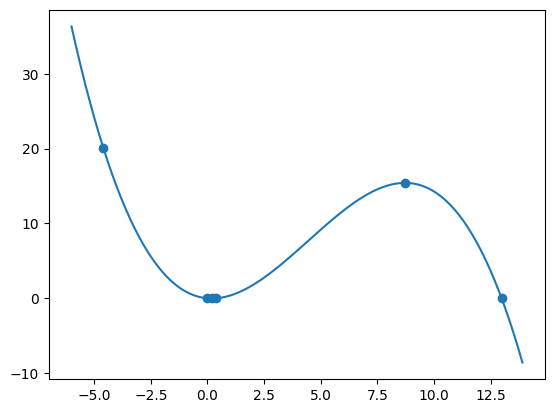

In [144]:
print("+===========================================+")
print("|   y = 0.00001x^4-0.05x^3+0.667x^2-0.25x   |")
print("+===========================================+")
# 0.00001x^{4}-0.05x^{3}+\frac{2}{3}x^{2}-\frac{1}{4}x
xs = [0, 0.38618, 0.19163, 8.71798, -4.6, 12.98189]
ys = [0, 0, -0.02378, 15.41735, 20.12794, 0]

coefs = findBestFitPoly(4, xs, ys)
print(__stringRep(coefs))

plot(xs, ys, coefs)

### Portfolio Problem 4: Homework 7 Advanced Problem 2
This problem tasks us with using principal component analysis to analyze the (scaled down) MNIST dataset of handwritten numbers

In [152]:
# get MNIST dataset from sklearn module
images = sklearn.datasets.load_digits()
all_digit_pictures = images["data"]

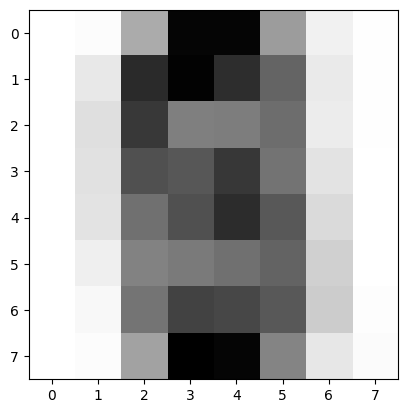

In [153]:
#part A
average_number = np.average(all_digit_pictures, axis=0)

plt.imshow(average_number.reshape((8,8)), cmap="Grays")

The image seen above is an average of every number in the dataset. This makes complete sense. Most numbers are vertically oriented, so the sides (columns 0 and 7) are completely white. The top and the bottom black pixels are as intense as they are since almost every image in the dataset has those pixels as filled in and every number has some amount of the top and bottom pixels filled in. This image can be represented as a 64 dimentional vector.

Part B asks us to take the entire set of MNIST numbers and subtract the average we found before. To check our work, we can show both the before and after of the same example. For this case, we show digit index 438, which appears to be a 7. After centering, we can still make out the shape of the seven, but the information displayed has a completely different meaning.

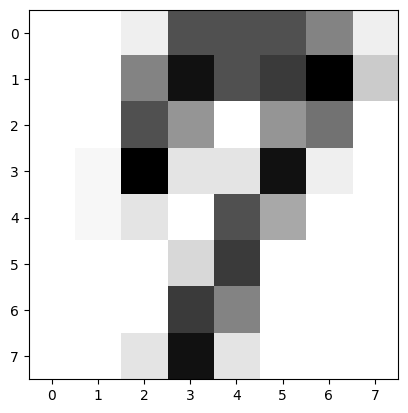

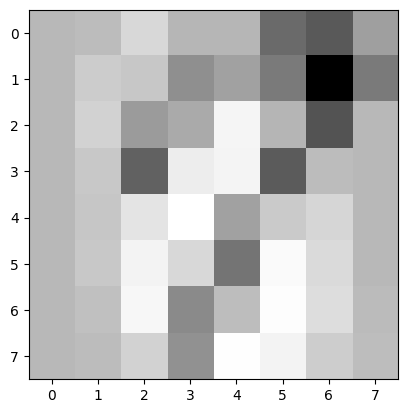

In [156]:
#part B
zero_centered_digits = all_digit_pictures-average_number

example = 438
plt.imshow(all_digit_pictures[example].reshape((8,8)), cmap='Grays')
plt.show()
plt.imshow(zero_centered_digits[example].reshape((8,8)), cmap='Grays')

The zero centered vector we see is actually the difference between the entire set's average and our particular vector. Here, we can see that this seven has a large difference in its row 1 and column 6 compared to the average.

In the following code block, we're completing part C, which involves finding the principal components of our dataset. This is a process that requires using the Singular Value Decomposition, which reveals the matrix's singular values.

In [158]:
# part C
U,S,VH = np.linalg.svd(zero_centered_digits)
print(VH[0])
print(VH.shape)

[ 1.77484909e-19  1.73094651e-02  2.23428835e-01  1.35913304e-01
  3.30323092e-02  9.66340844e-02  8.32943805e-03 -2.26900082e-03
  3.20516495e-04  1.19308905e-01  2.44451676e-01 -1.48512745e-01
  4.67319410e-02  2.17740744e-01  1.48136776e-02 -4.47779518e-03
  4.94136398e-05  7.95419375e-02 -8.33951454e-02 -2.15915342e-01
  1.72126801e-01  1.63712098e-01 -2.86444452e-02 -4.23251803e-03
 -9.85488574e-05 -6.42319144e-02 -2.54093316e-01  3.56771026e-02
  2.09462569e-01  4.31311420e-02 -5.13118688e-02 -2.13422732e-04
  0.00000000e+00 -1.59950883e-01 -3.68690774e-01 -1.64406827e-01
 -8.52007908e-02 -3.72982855e-02 -2.15866980e-02  0.00000000e+00
 -1.28865585e-03 -1.06945287e-01 -3.03067457e-01 -2.47813041e-01
 -2.09637296e-01 -1.22325219e-02  3.69458497e-02 -1.61485028e-03
 -6.93023548e-04  8.35144239e-03  5.58598986e-02 -9.30534169e-02
 -1.07387720e-01  1.37734565e-01  6.32879466e-02 -9.61671077e-04
 -9.55079131e-06  1.40786840e-02  2.35675488e-01  1.41225588e-01
  9.15964553e-03  8.94184

In the code block below, we see the a loop that shows us the first 4 principal components of our dataset. (as well as a helper function to make it easier to show our vectors)

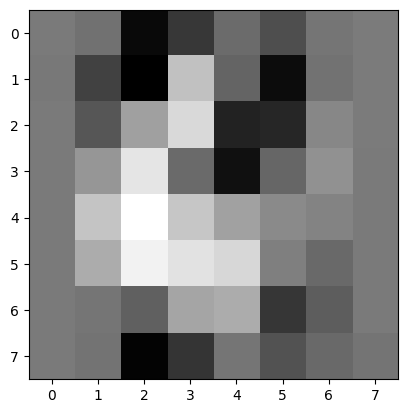

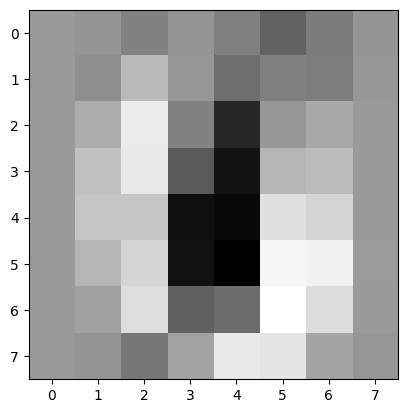

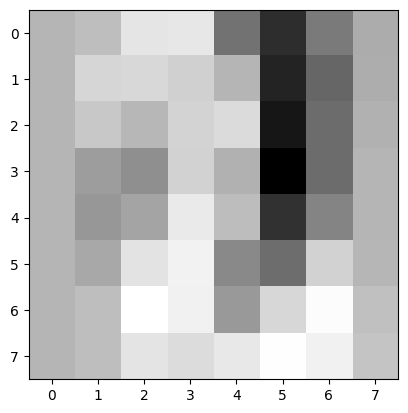

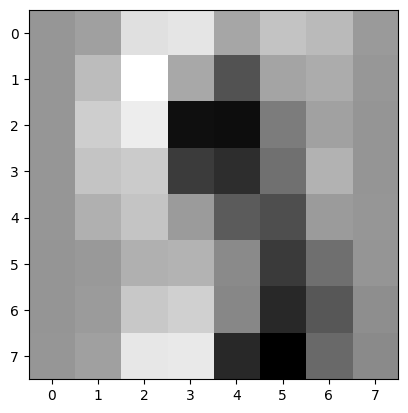

In [162]:
def graph_vector(vector):
  plt.imshow(vector.reshape((8,8)), cmap='Grays')
  plt.show()

for i in range(4):
    graph_vector(VH[i])

The principal components we see above are "direction vectors," showing us the general trends of the dataset, where white pixels indicate movement in the negative direction, black pixels indicate movement in the positive direction, and grey pixels indicate no movement.

Part D covers the "proportion of variance explained," which is the amount of variance in the dataset that can be explained with the first $n$ principal components. The idea here is that when we decompose our matrix, we get a bunch of matrices that, when used in tandem, explain the whole dataset. If we use the first few, some of that explanation is lost.

In [170]:
def proportion_of_variance(r, singular_values):
  R_sum = 0
  N_sum = 0
  for i, sigma in enumerate(singular_values):
    if i < r:
      R_sum += sigma**2
    N_sum += sigma**2
  return R_sum/N_sum

outputs = [proportion_of_variance(i+1, S) for i in range(len(S))]

i = 0
while(outputs[i] < 0.9):
  i+=1
print(f'the first {i+1} principal components account for {(outputs[i]*100):.3f}% of the data. This is the fewest needed to get over 90%')

the first 21 principal components account for 90.320% of the data. This is the fewest needed to get over 90%


According to the code block above, it takes the first 21 principal components to account for 90 percent of the variance in the data. Adding further principal components will result in a severe amount of diminishing returns. In the code block below, we will graph the variance explained.

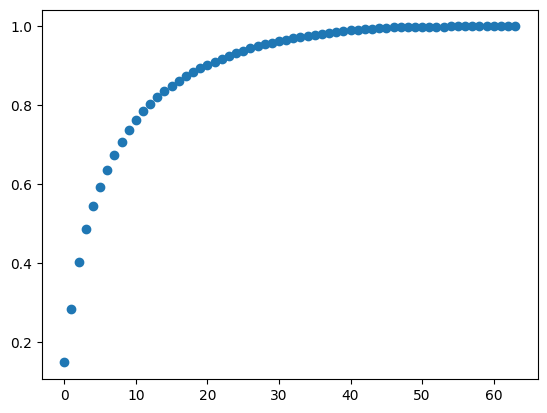

In [172]:
plt.scatter([i for i in range(len(outputs))], outputs)
plt.show()

As you can see, the first 10 or so principal components do the majority of the work, whereas the last 10 do almost nothing.

Below is part E, where we use the first $n$ princpal components to visualize a digit in our dataset. This allows us to see how much of our digit will be accounted for given a smaller amount of information held. 

1 Principal Component:
(64, 64)


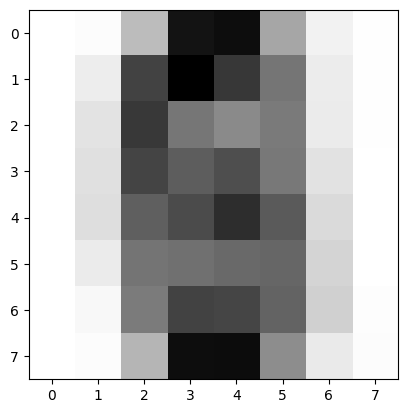

2 Principal Components:
(64, 64)


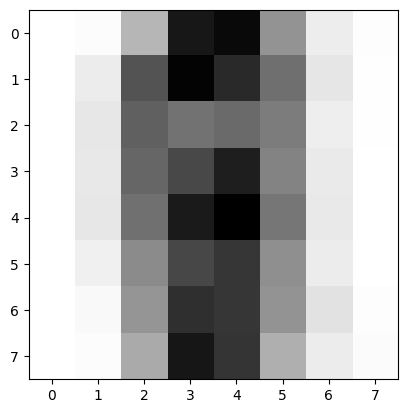

4 Principal Components:
(64, 64)


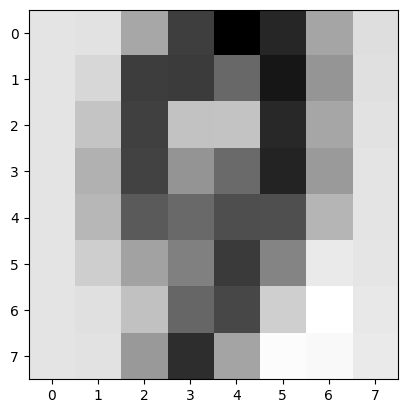

8 Principal Components:
(64, 64)


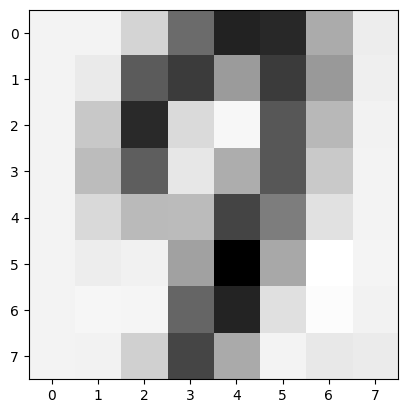

16 Principal Components:
(64, 64)


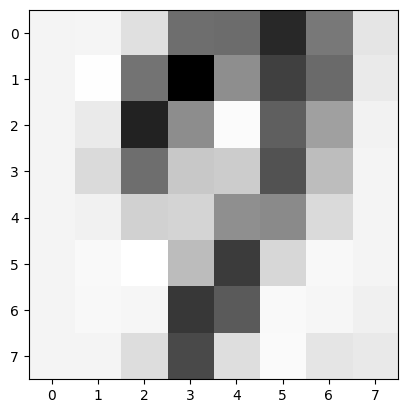

Full Digit:


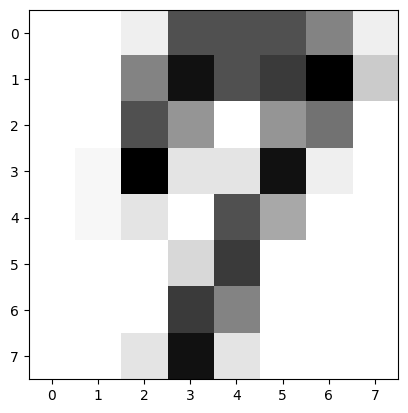

In [181]:
def project_onto_pca(principal_components, num_components, digit):
  subspace = principal_components[0:num_components, :]
  print((subspace.T@subspace).shape)
  return (subspace.T @ subspace)@ digit

arbitrary_digit = 438

print("1 Principal Component:")
graph_vector(project_onto_pca(VH,1, zero_centered_digits[arbitrary_digit]) + average_number)
print("2 Principal Components:")
graph_vector(project_onto_pca(VH,2, zero_centered_digits[arbitrary_digit]) + average_number)
print("4 Principal Components:")
graph_vector(project_onto_pca(VH,4, zero_centered_digits[arbitrary_digit]) + average_number)
print("8 Principal Components:")
graph_vector(project_onto_pca(VH,8, zero_centered_digits[arbitrary_digit]) + average_number)
print("16 Principal Components:")
graph_vector(project_onto_pca(VH,16, zero_centered_digits[arbitrary_digit]) + average_number)
print("Full Digit:")
graph_vector(all_digit_pictures[arbitrary_digit])


The four displayed vectors above indicate what the digit would look like if limited to 1, 2, 4, 8, and 16 principal components, as well as what the digit looks like in its entirety. We can see that the first graph, or the digit when projected onto only the first principal component barely looks any different from our average digit. This makes sense, especially given our knowledge of the proportion of variance explained in the graph above, where we see that the first principal component makes up less than 20% of the total variance in the dataset. The 2nd principal component doesn't help all that much and neither does the first 4. Only once we get up to 8 components does our 7 really start to show up.